# Recurrent Neural Network

#### Prediction of the 10-day closing stock price for Walmart using RNN, LTSM, Gru, and Conv1D techniques

## By Shambhavi Mishra
### U01040066

### Lodaing the libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras

# Set random seed
np.random.seed(42)

# Configure plotting settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# Additional imports
from sklearn.metrics import mean_squared_error

### Loading the dataset

In [2]:
# Load the data into a pandas dataframe
df = pd.read_csv("/Users/shambhavimishra/Downloads/WMT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,156.369995,157.470001,154.350006,156.940002,154.475662,6019200
1,2022-04-26,156.369995,158.130005,155.199997,155.300003,152.861389,6533700
2,2022-04-27,155.529999,156.199997,154.020004,154.240005,151.818054,5832300
3,2022-04-28,155.229996,156.979996,154.100006,156.210007,153.757126,4985300
4,2022-04-29,155.809998,156.220001,152.710007,152.990005,150.587677,7029600


In [4]:
# Set the date column as the index
df.set_index('Date', inplace=True)

In [5]:
df = df.sort_values(by='Date')

In [6]:
#Drop the columns we don't need
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [7]:
df

,Close
Date,
2022-04-25,156.940002
2022-04-26,155.300003
2022-04-27,154.240005
2022-04-28,156.210007
2022-04-29,152.990005
...,...
2023-04-17,149.520004
2023-04-18,149.850006
2023-04-19,150.009995


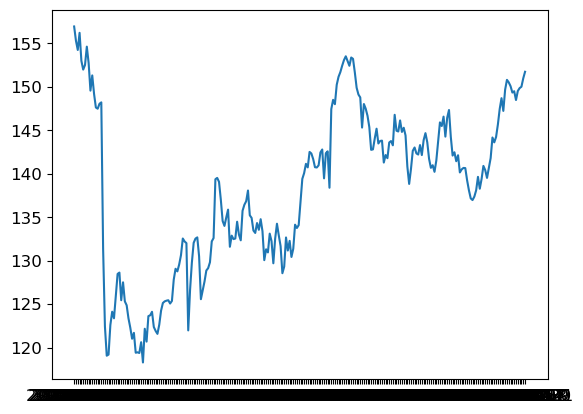

In [8]:
#Plot stock price
plt.plot(df['Close'])

plt.show()

### Data Cleaning

In [9]:
# Remove all null values
df = df.dropna()

In [10]:
df

,Close
Date,
2022-04-25,156.940002
2022-04-26,155.300003
2022-04-27,154.240005
2022-04-28,156.210007
2022-04-29,152.990005
...,...
2023-04-17,149.520004
2023-04-18,149.850006
2023-04-19,150.009995


In [11]:
close_price = df["Close"][-100:]

In [12]:
df = pd.DataFrame({'Date': close_price.index, 'Close': close_price.values})
df

,Date,Close
0,2022-11-28,153.509995
1,2022-11-29,152.970001
2,2022-11-30,152.419998
3,2022-12-01,153.369995
4,2022-12-02,153.220001
...,...,...
95,2023-04-17,149.520004
96,2023-04-18,149.850006
97,2023-04-19,150.009995
98,2023-04-20,150.970001


### Reshape the dataset

In [13]:
#reshape the data
df.shape[0]/10

10.0

In [14]:
df.groupby(['Date']).count()

,Close
Date,
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
2022-12-02,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [15]:
df_count = pd.DataFrame(df.groupby(['Date']).count()['Close'])

df_count

,Close
Date,
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
2022-12-02,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [16]:
df_temp = np.array(df['Close']).reshape(10,10)

df_temp

array([[153.509995, 152.970001, 152.419998, 153.369995, 153.220001,
        151.649994, 149.889999, 149.110001, 148.779999, 145.309998],
       [148.020004, 147.490005, 146.669998, 145.360001, 142.75    ,
        142.800003, 144.050003, 145.179993, 143.479996, 143.770004],
       [143.809998, 141.289993, 142.149994, 141.789993, 143.600006,
        143.759995, 143.270004, 146.779999, 144.949997, 144.860001],
       [146.130005, 144.809998, 145.289993, 144.410004, 140.839996,
        138.830002, 140.539993, 142.639999, 143.020004, 142.339996],
       [142.210007, 143.300003, 142.149994, 143.869995, 144.669998,
        143.619995, 141.710007, 140.679993, 140.979996, 140.220001],
       [141.520004, 143.720001, 145.910004, 145.490005, 146.570007,
        144.270004, 146.440002, 147.330002, 144.240005, 142.089996],
       [142.470001, 141.440002, 142.130005, 140.149994, 140.5     ,
        140.669998, 140.649994, 139.25    , 138.100006, 137.169998],
       [136.970001, 137.369995, 138.10000

In [17]:
df_convert = pd.DataFrame(df_temp, columns=np.arange(0,10,1))

df_convert

,0,1,2,3,4,5,6,7,8,9
0,153.509995,152.970001,152.419998,153.369995,153.220001,151.649994,149.889999,149.110001,148.779999,145.309998
1,148.020004,147.490005,146.669998,145.360001,142.750000,142.800003,144.050003,145.179993,143.479996,143.770004
2,143.809998,141.289993,142.149994,141.789993,143.600006,143.759995,143.270004,146.779999,144.949997,144.860001
3,146.130005,144.809998,145.289993,144.410004,140.839996,138.830002,140.539993,142.639999,143.020004,142.339996
4,142.210007,143.300003,142.149994,143.869995,144.669998,143.619995,141.710007,140.679993,140.979996,140.220001
5,141.520004,143.720001,145.910004,145.490005,146.570007,144.270004,146.440002,147.330002,144.240005,142.089996
6,142.470001,141.440002,142.130005,140.149994,140.500000,140.669998,140.649994,139.250000,138.100006,137.169998
7,136.970001,137.369995,138.100006,139.639999,138.279999,139.399994,140.899994,140.419998,139.520004,140.649994
8,141.800003,144.169998,143.610001,144.229996,145.669998,147.449997,148.690002,147.229996,149.669998,150.800003
9,150.509995,150.070007,149.339996,149.490005,148.479996,149.520004,149.850006,150.009995,150.970001,151.729996


In [18]:
row_count = df.shape[0]
row_count

100

In [19]:
close_prices = df['Close'].values

In [20]:
print(close_prices)

[153.509995 152.970001 152.419998 153.369995 153.220001 151.649994
 149.889999 149.110001 148.779999 145.309998 148.020004 147.490005
 146.669998 145.360001 142.75     142.800003 144.050003 145.179993
 143.479996 143.770004 143.809998 141.289993 142.149994 141.789993
 143.600006 143.759995 143.270004 146.779999 144.949997 144.860001
 146.130005 144.809998 145.289993 144.410004 140.839996 138.830002
 140.539993 142.639999 143.020004 142.339996 142.210007 143.300003
 142.149994 143.869995 144.669998 143.619995 141.710007 140.679993
 140.979996 140.220001 141.520004 143.720001 145.910004 145.490005
 146.570007 144.270004 146.440002 147.330002 144.240005 142.089996
 142.470001 141.440002 142.130005 140.149994 140.5      140.669998
 140.649994 139.25     138.100006 137.169998 136.970001 137.369995
 138.100006 139.639999 138.279999 139.399994 140.899994 140.419998
 139.520004 140.649994 141.800003 144.169998 143.610001 144.229996
 145.669998 147.449997 148.690002 147.229996 149.669998 150.80

### Reshape for standardizing data

In [21]:
# standardization the data
df_feature = np.array(df_convert).ravel().reshape(-1,1)

df_feature.shape

(100, 1)

In [22]:
df_feature

array([[153.509995],
       [152.970001],
       [152.419998],
       [153.369995],
       [153.220001],
       [151.649994],
       [149.889999],
       [149.110001],
       [148.779999],
       [145.309998],
       [148.020004],
       [147.490005],
       [146.669998],
       [145.360001],
       [142.75    ],
       [142.800003],
       [144.050003],
       [145.179993],
       [143.479996],
       [143.770004],
       [143.809998],
       [141.289993],
       [142.149994],
       [141.789993],
       [143.600006],
       [143.759995],
       [143.270004],
       [146.779999],
       [144.949997],
       [144.860001],
       [146.130005],
       [144.809998],
       [145.289993],
       [144.410004],
       [140.839996],
       [138.830002],
       [140.539993],
       [142.639999],
       [143.020004],
       [142.339996],
       [142.210007],
       [143.300003],
       [142.149994],
       [143.869995],
       [144.669998],
       [143.619995],
       [141.710007],
       [140.6

In [23]:
# Scale the data between 0 and 1

scaler=MinMaxScaler(feature_range=(0,1))
close_prices=scaler.fit_transform(np.array(close_prices).reshape(-1,1))

In [24]:
print(close_prices)

[[1.        ]
 [0.96735223]
 [0.93409931]
 [0.99153567]
 [0.9824671 ]
 [0.88754524]
 [0.7811368 ]
 [0.7339785 ]
 [0.71402674]
 [0.50423217]
 [0.66807781]
 [0.63603433]
 [0.58645711]
 [0.50725532]
 [0.34945593]
 [0.35247909]
 [0.42805348]
 [0.49637213]
 [0.39359113]
 [0.41112488]
 [0.41354289]
 [0.26118462]
 [0.31317986]
 [0.29141437]
 [0.40084688]
 [0.41051974]
 [0.38089512]
 [0.59310771]
 [0.48246668]
 [0.47702557]
 [0.55380939]
 [0.47400241]
 [0.50302267]
 [0.44981897]
 [0.23397802]
 [0.11245476]
 [0.21583998]
 [0.34280532]
 [0.36578024]
 [0.32466729]
 [0.31680822]
 [0.38270884]
 [0.31317986]
 [0.41717028]
 [0.46553808]
 [0.40205541]
 [0.28657846]
 [0.22430431]
 [0.24244235]
 [0.19649342]
 [0.27509097]
 [0.40810172]
 [0.54050824]
 [0.5151153 ]
 [0.5804117 ]
 [0.44135463]
 [0.57255166]
 [0.62636063]
 [0.43954091]
 [0.30955241]
 [0.33252733]
 [0.27025409]
 [0.31197133]
 [0.19226083]
 [0.21342202]
 [0.22370002]
 [0.22249059]
 [0.13784763]
 [0.06831955]
 [0.01209172]
 [0.        ]
 [0.02

In [25]:
# Reshaping the data
df_reshaped = close_prices.reshape(10,10)
df_reshaped.shape

(10, 10)

In [26]:
pd.DataFrame(df_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.967352,0.934099,0.991536,0.982467,0.887545,0.781137,0.733979,0.714027,0.504232
1,0.668078,0.636034,0.586457,0.507255,0.349456,0.352479,0.428053,0.496372,0.393591,0.411125
2,0.413543,0.261185,0.313180,0.291414,0.400847,0.410520,0.380895,0.593108,0.482467,0.477026
3,0.553809,0.474002,0.503023,0.449819,0.233978,0.112455,0.215840,0.342805,0.365780,0.324667
4,0.316808,0.382709,0.313180,0.417170,0.465538,0.402055,0.286578,0.224304,0.242442,0.196493
5,0.275091,0.408102,0.540508,0.515115,0.580412,0.441355,0.572552,0.626361,0.439541,0.309552
6,0.332527,0.270254,0.311971,0.192261,0.213422,0.223700,0.222491,0.137848,0.068320,0.012092
7,0.000000,0.024183,0.068320,0.161427,0.079202,0.146916,0.237605,0.208585,0.154172,0.222491
8,0.292020,0.435308,0.401451,0.438936,0.525998,0.633615,0.708586,0.620314,0.767836,0.836155
9,0.818621,0.792020,0.747884,0.756953,0.695889,0.758767,0.778719,0.788392,0.846433,0.892382


### Splitting the data

In [27]:
## Splitting dataset into train and test split
training_size = int(len(close_prices)*0.70)
test_size = len(close_prices)-training_size
train_data,test_data = close_prices[0:training_size,:],close_prices[training_size:len(close_prices),:1]

In [28]:
training_size,test_size

(70, 30)

In [29]:
train_data

array([[1.        ],
       [0.96735223],
       [0.93409931],
       [0.99153567],
       [0.9824671 ],
       [0.88754524],
       [0.7811368 ],
       [0.7339785 ],
       [0.71402674],
       [0.50423217],
       [0.66807781],
       [0.63603433],
       [0.58645711],
       [0.50725532],
       [0.34945593],
       [0.35247909],
       [0.42805348],
       [0.49637213],
       [0.39359113],
       [0.41112488],
       [0.41354289],
       [0.26118462],
       [0.31317986],
       [0.29141437],
       [0.40084688],
       [0.41051974],
       [0.38089512],
       [0.59310771],
       [0.48246668],
       [0.47702557],
       [0.55380939],
       [0.47400241],
       [0.50302267],
       [0.44981897],
       [0.23397802],
       [0.11245476],
       [0.21583998],
       [0.34280532],
       [0.36578024],
       [0.32466729],
       [0.31680822],
       [0.38270884],
       [0.31317986],
       [0.41717028],
       [0.46553808],
       [0.40205541],
       [0.28657846],
       [0.224

## Create Input and Target values

In [30]:
import numpy as np

In [31]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=9):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] 
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## Adding one more dimension to make it ready for RNNs

In [32]:
# reshape data
look_back = 9
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [33]:
print(X_train.shape), print(y_train.shape)

(60, 9)
(60,)


(None, None)

In [34]:
print(X_test.shape), print(y_test.shape)

(20, 9)
(20,)


(None, None)

In [35]:
# reshape input to be which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
X_train, X_test, y_train, y_test

(array([[[1.        ],
         [0.96735223],
         [0.93409931],
         [0.99153567],
         [0.9824671 ],
         [0.88754524],
         [0.7811368 ],
         [0.7339785 ],
         [0.71402674]],
 
        [[0.96735223],
         [0.93409931],
         [0.99153567],
         [0.9824671 ],
         [0.88754524],
         [0.7811368 ],
         [0.7339785 ],
         [0.71402674],
         [0.50423217]],
 
        [[0.93409931],
         [0.99153567],
         [0.9824671 ],
         [0.88754524],
         [0.7811368 ],
         [0.7339785 ],
         [0.71402674],
         [0.50423217],
         [0.66807781]],
 
        [[0.99153567],
         [0.9824671 ],
         [0.88754524],
         [0.7811368 ],
         [0.7339785 ],
         [0.71402674],
         [0.50423217],
         [0.66807781],
         [0.63603433]],
 
        [[0.9824671 ],
         [0.88754524],
         [0.7811368 ],
         [0.7339785 ],
         [0.71402674],
         [0.50423217],
         [0.66807781],

In [37]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(60, 9, 1)
(60,)
(20, 9, 1)
(20,)


## A normal (cross-sectional) NN

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(27, activation='relu'),
    keras.layers.Dense(1, activation=None)
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

#Predict:
y_pred = model.predict(X_test)


# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()


Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 0.0194
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0146
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 13/100
2/2 [==============================] - 0s 4ms/s

In [39]:
comparison

,actual,predicted
0,140.649994,140.460434
1,141.800003,140.756912
2,144.169998,141.836655
3,143.610001,143.144745
4,144.229996,143.539185
5,145.669998,143.742569
6,147.449997,144.525299
7,148.690002,145.793823
8,147.229996,146.582001
9,149.669998,146.632904


In [40]:
mean_squared_error(comparison['actual'], comparison['predicted'])

4.895338720259292

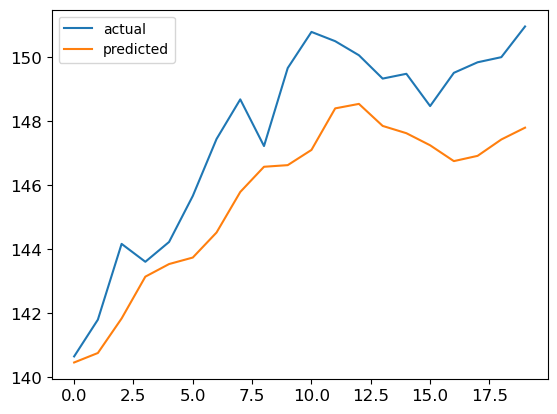

In [41]:

plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simplest RNN

In [42]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(27, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.0324
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 13/100
2/2 [==============================] - 0s 6ms/

### Predictions

In [44]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 285ms/step


In [45]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [46]:
comparison.head(10)

,actual,predicted
0,140.649994,141.443588
1,141.800003,141.515671
2,144.169998,142.599915
3,143.610001,144.247406
4,144.229996,144.308411
5,145.669998,145.035583
6,147.449997,145.518494
7,148.690002,146.485107
8,147.229996,147.274414
9,149.669998,146.197098


In [47]:
mean_squared_error(comparison['actual'], comparison['predicted'])

5.233328445492317

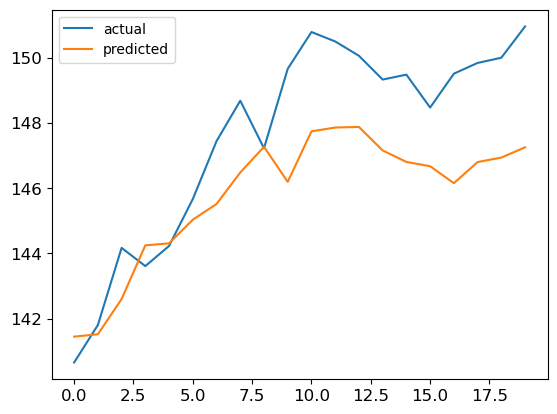

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(27, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(27, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 0.0715
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0476
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0376
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0289
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0215
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0101
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 13/100
2/2 [==============================] - 0s 10ms

### Predictions

In [51]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 219ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison.head(10)

,actual,predicted
0,140.649994,140.221817
1,141.800003,141.363663
2,144.169998,142.316406
3,143.610001,143.889084
4,144.229996,143.512299
5,145.669998,144.120071
6,147.449997,144.863419
7,148.690002,146.296997
8,147.229996,147.107224
9,149.669998,146.053604


In [54]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.9267061690301603

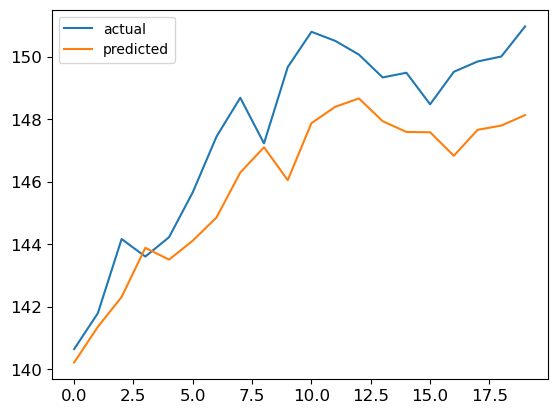

In [55]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM neural network with one layer 

In [81]:
model = keras.models.Sequential([
    keras.layers.LSTM(54, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 0.1575
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1361
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 0.1168
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0975
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0798
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0635
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0495
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0369
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 12/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 13/100
2/2 [==============================] - 0s 9ms

### Predictions

In [83]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 173ms/step


In [84]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [85]:
comparison.head(10)

,actual,predicted
0,140.649994,140.988342
1,141.800003,141.190643
2,144.169998,141.518646
3,143.610001,142.163910
4,144.229996,142.532074
5,145.669998,142.912842
6,147.449997,143.447693
7,148.690002,144.144852
8,147.229996,144.863876
9,149.669998,145.111847


In [86]:
mean_squared_error(comparison['actual'], comparison['predicted'])

10.253130131813197

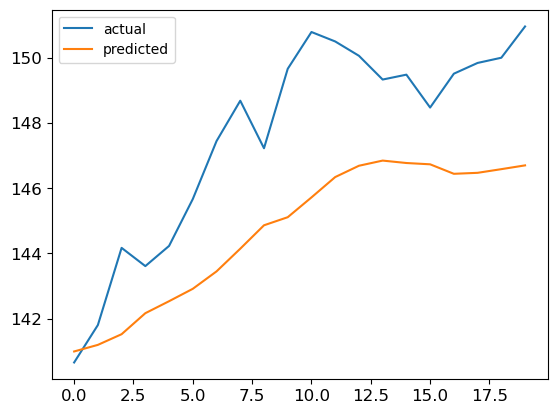

In [87]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM neural network with more layer 

In [93]:
model = keras.models.Sequential([
    keras.layers.LSTM(36, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(36, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 12ms/step - loss: 0.1293
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0932
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0646
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0410
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0254
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0177
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0199
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 9/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0260
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0237
Epoch 11/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0195
Epoch 12/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 13/100
2/2 [==============================]

### Predictions

In [94]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 851ms/step


In [95]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [96]:
comparison.head(10)

,actual,predicted
0,140.649994,141.382065
1,141.800003,141.512497
2,144.169998,141.699554
3,143.610001,142.041534
4,144.229996,142.361069
5,145.669998,142.681335
6,147.449997,143.041809
7,148.690002,143.486359
8,147.229996,143.989838
9,149.669998,144.330383


In [97]:
mean_squared_error(comparison['actual'], comparison['predicted'])

15.538417978961638

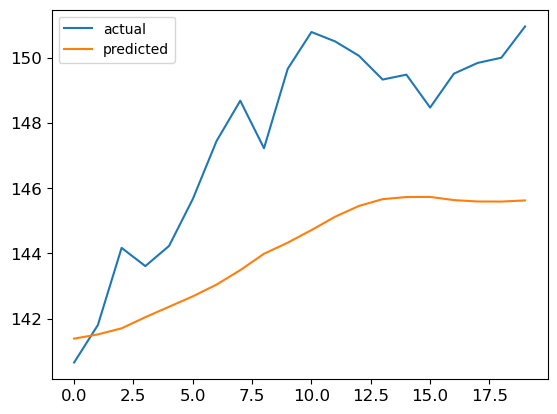

In [98]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU Neural network with multiple layers 

In [99]:
model = keras.models.Sequential([
    keras.layers.GRU(27, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(27, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 13ms/step - loss: 0.0841
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0490
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0313
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0215
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0133
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 0.0131
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0130
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0130
Epoch 12/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0129
Epoch 13/100
2/2 [==============================] - 0s 

### Predictions

In [100]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 282ms/step


In [101]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [102]:
comparison.head(10)

,actual,predicted
0,140.649994,141.155197
1,141.800003,141.291626
2,144.169998,141.675720
3,143.610001,142.506897
4,144.229996,142.995697
5,145.669998,143.381622
6,147.449997,143.937088
7,148.690002,144.731903
8,147.229996,145.564056
9,149.669998,145.746170


In [103]:
mean_squared_error(comparison['actual'], comparison['predicted'])

7.55698402798553

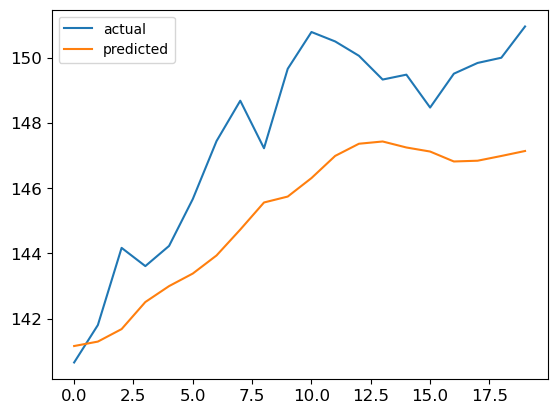

In [104]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## 1D Conv neural network using Keras 

In [105]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(27, activation='relu', return_sequences=True),
    keras.layers.GRU(27, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 4s 19ms/step - loss: 0.1355
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1077
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0876
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0692
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0536
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0400
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0293
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0159
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0165
Epoch 12/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0187
Epoch 13/100
2/2 [==============================] - 0

### Predictions

In [106]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 280ms/step


In [107]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [108]:
comparison.head(10)

,actual,predicted
0,140.649994,141.325500
1,141.800003,141.362732
2,144.169998,141.679596
3,143.610001,142.417953
4,144.229996,143.025162
5,145.669998,143.380493
6,147.449997,143.860748
7,148.690002,144.616104
8,147.229996,145.459946
9,149.669998,145.675629


In [109]:
mean_squared_error(comparison['actual'], comparison['predicted'])

8.808035729341942

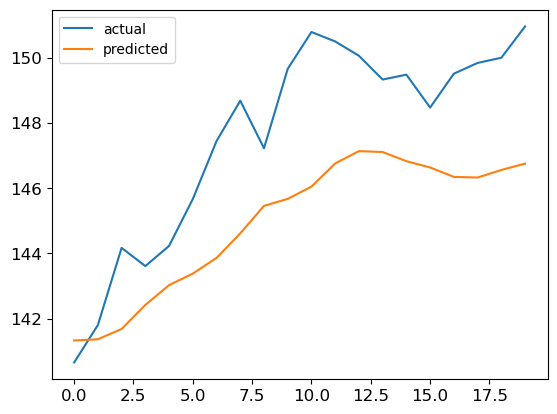

In [110]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conclusion: 

#### After analyzing the various models trained for stock price prediction, it seems that the "Simple RNN" with more layers performed the best. This model achieved a mean squared error of 3.92, which is the lowest of all the models tested.

#### One important difference between the Simple RNN with more layers and the other models is the number of layers used in the model. The Simple RNN with more layers used multiple layers which could capture more complex patterns in the data, resulting in a lower mean squared error. In contrast, some of the other models used only one layer, which might not be enough to fully capture the nuances of the data.

##### A normal(corss-sectional) NN had mean squared error of 4.89
##### Simplest RNN had mean squared error of 5.23
##### Simplest RNN with more layers had mean squared error of 3.92
##### LSTM Neural Networ with one layer had mean squared error of 10.25
##### LSTM Neural Networ with more layers had mean squared error of 15.53
##### GRU Neural Networ with multiple layers had mean squared error of 7.55
##### 1D Conv Neural Networ using Keras had mean squared error of 8.80


#### All of the models performed relatively well, with mean squared errors. However, the Simple RNN with more layers was the most effective, achieving the lowest mean squared error.

#### Thus, the Simple RNN with more layers performed the best in your stock price prediction task, achieving the lowest mean squared error. This model was able to capture complex patterns in the data due to the multiple layers used in the model. However, all of the models tested showed promising results, suggesting that deep learning models can be effective tools for stock price prediction.